<a href="https://colab.research.google.com/github/charlie-paterson/CognoRise-Infotech/blob/main/Titanic%20Survival%20Prediction/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

## Loading Dataset

In [ ]:
df = pd.read_csv('train.csv')
#Pclass = passenger class
#Sibsp = number of siblings/spouses onboard
#parch = number of parents/children onboard
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualisations

In [ ]:
df_copy = df.copy()

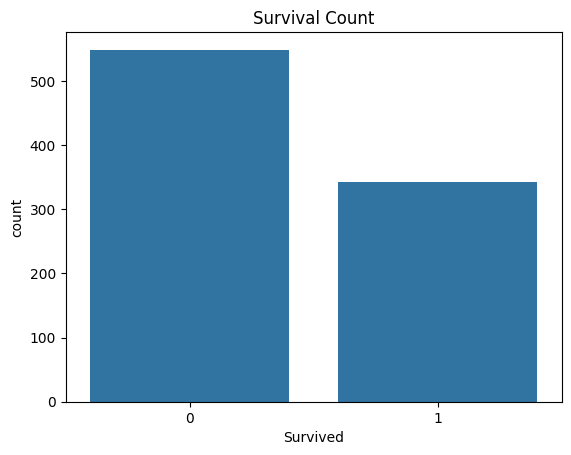

In [ ]:
sns.countplot(x='Survived', data=df_copy)
plt.title('Survival Count')
plt.show()

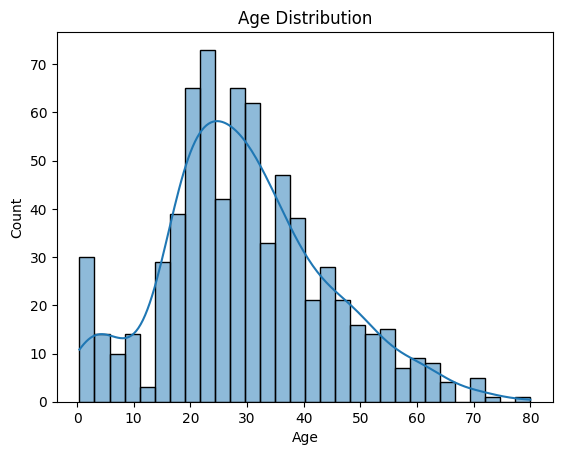

In [ ]:
sns.histplot(df_copy['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

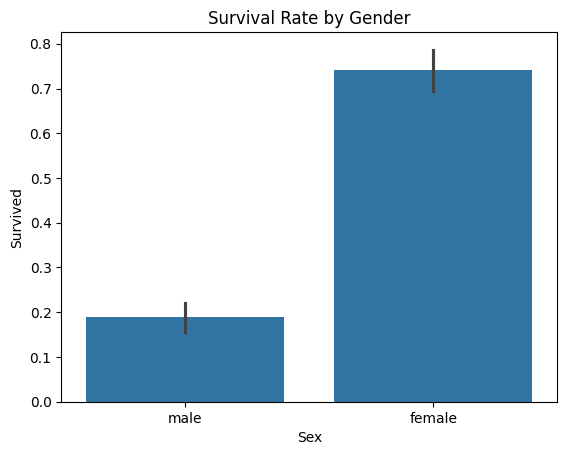

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df_copy)
plt.title('Survival Rate by Gender')
plt.show()

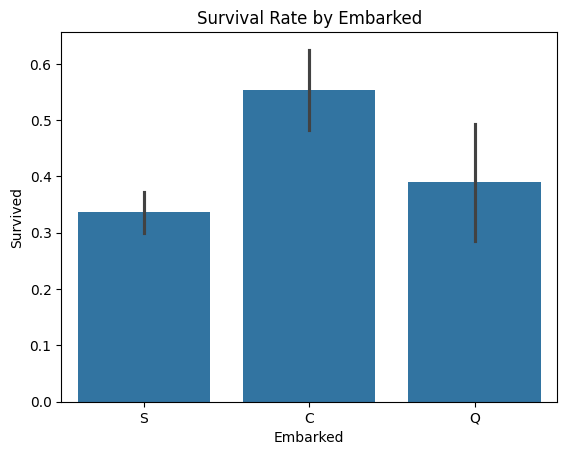

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df_copy)
plt.title('Survival Rate by Embarked')
plt.show()

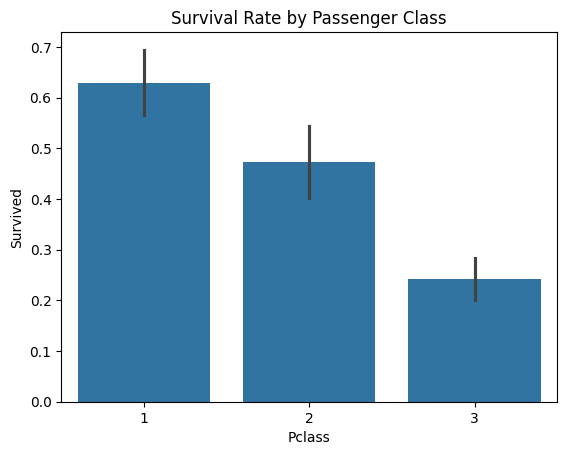

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df_copy)
plt.title('Survival Rate by Passenger Class')
plt.show()

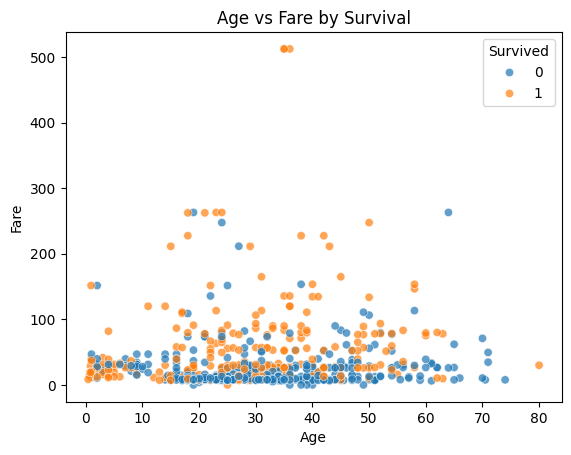

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs Fare by Survival')
plt.show()

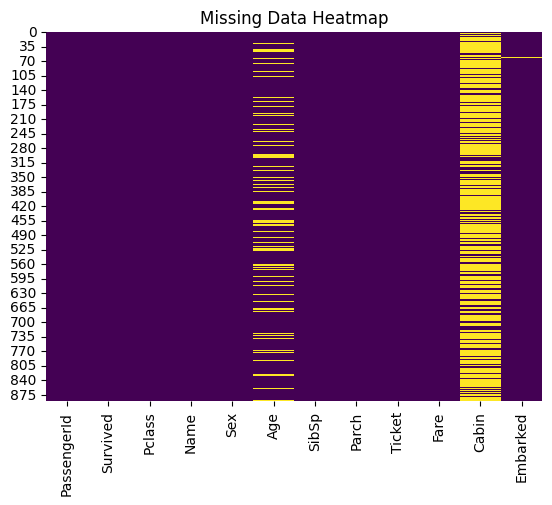

In [ ]:
sns.heatmap(df_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## Encoding Categorical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
label=preprocessing.LabelEncoder()

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
label.fit(df.Sex)
df.Sex=label.transform(df.Sex)

In [ ]:
label.fit(df.Embarked)
df.Embarked=label.transform(df.Embarked)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Age_Pclass'] = df['Age'] * df['Pclass']
df['Sex_Age'] = df['Sex'] * df['Age']
df['Sex_Fare'] = df['Sex'] * df['Fare']
df["Fare"] = np.log(df["Fare"] + 1)
df['Sex_Pclass'] = df['Sex'] * df['Pclass']
df['Fare_Pclass'] = df['Fare'] * df['Pclass']
df['SibSp_Parch'] = df['SibSp'] + df['Parch']
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)
label.fit(df.age_group)
df.age_group=label.transform(df.age_group)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_Pclass,Sex_Age,Sex_Fare,Sex_Pclass,Fare_Pclass,SibSp_Parch,age_group,IsAlone
0,0,3,1,22.000000,1,0,2.110213,2,2,66.000000,22.0,7.25,3,6.330640,1,2,0
1,1,1,0,38.000000,1,0,4.280593,0,2,38.000000,0.0,0.00,0,4.280593,1,3,0
2,1,3,0,26.000000,0,0,2.188856,2,1,78.000000,0.0,0.00,0,6.566569,0,2,1
3,1,1,0,35.000000,1,0,3.990834,2,2,35.000000,0.0,0.00,0,3.990834,1,3,0
4,0,3,1,35.000000,0,0,2.202765,2,1,105.000000,35.0,8.05,3,6.608294,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2,1,54.000000,27.0,13.00,2,5.278115,0,2,1
887,1,1,0,19.000000,0,0,3.433987,2,1,19.000000,0.0,0.00,0,3.433987,0,2,1
888,0,3,0,29.699118,1,2,3.196630,2,4,89.097353,0.0,0.00,0,9.589891,3,3,0
889,1,1,1,26.000000,0,0,3.433987,0,1,26.000000,26.0,30.00,1,3.433987,0,2,1


## Correlation Heatmap

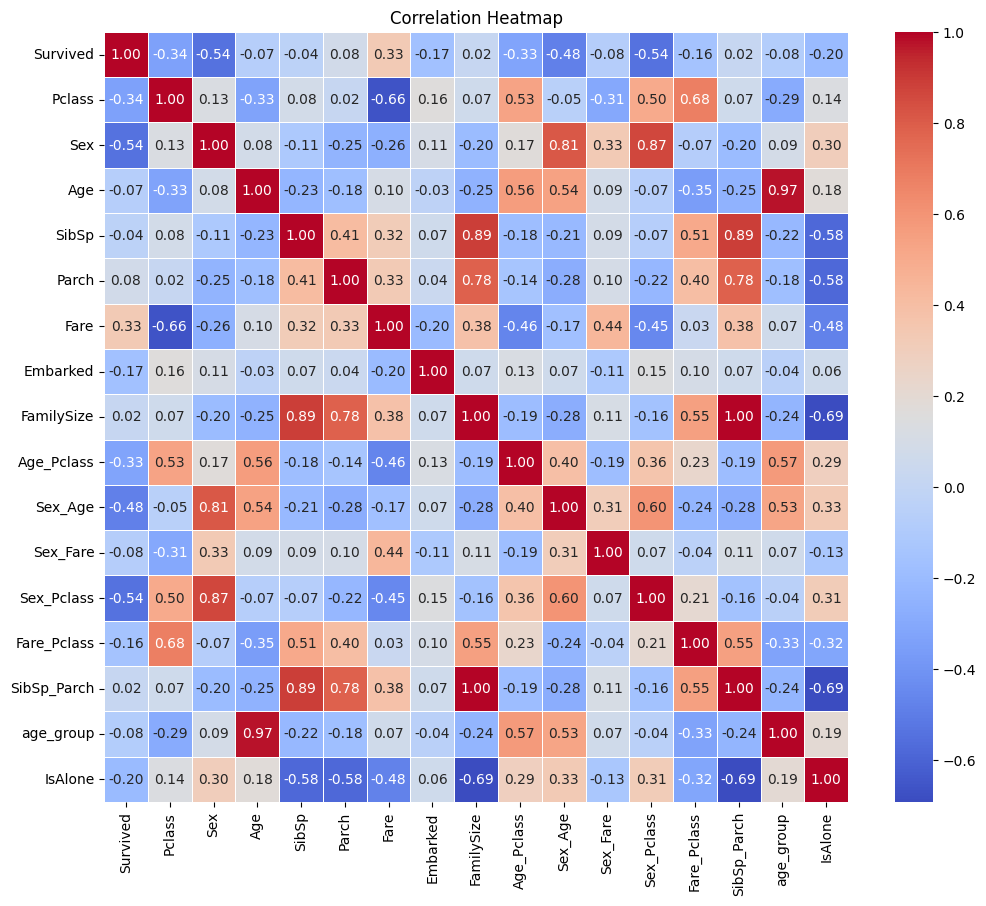

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Training

In [ ]:
features = ['Pclass', 'SibSp','Parch', 'Fare', 'Embarked', 'FamilySize', 'Age_Pclass', 'Sex_Fare', 'Sex_Age', 'IsAlone']
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42)

In [ ]:
X_train_array = np.asarray(X_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
X_test_array = np.asarray(X_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')

### Logistic Regression Model

In [ ]:
log_reg = sm.Logit(y_train_array, X_train_array)
log_reg_results = log_reg.fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.436566
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.3408
Time:                        09:28:00   Log-Likelihood:                -310.84
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 7.435e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9801      0.219     -4.466      0.000      -1.410      -0.550
x2            -3.6026      1.

In [ ]:
predicted_probabilities = log_reg_results.predict(X_test_array)
predicted_classes = np.round(predicted_probabilities).astype(int)

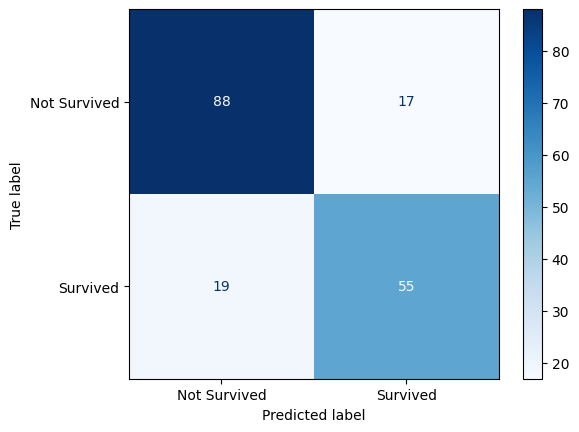

 
Accuracy Score: 0.80


In [ ]:
cm = confusion_matrix(y_test_array, predicted_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()
print(" ")
accuracy = accuracy_score(y_test_array, predicted_classes)
print(f"Accuracy Score: {accuracy:.2f}")

### Decision Tree Model

In [ ]:
best_ccp_alpha = 0.01
dt = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=365)
dt.fit(X_train_array, y_train)
y_pred = dt.predict(X_test_array)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)
from sklearn.metrics import roc_auc_score, f1_score
y_pred_proba = dt.predict_proba(X_test_array)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[92 13]
 [23 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC AUC: 0.80
F1 Score: 0.74
Accuracy Score: 0.80


### Random Forest Model

In [ ]:
best_ccp_alpha = 0.01
rf = RandomForestClassifier(ccp_alpha=best_ccp_alpha, random_state=365)
rf.fit(X_train_array, y_train_array)
y_pred = rf.predict(X_test_array)

In [ ]:
print("Confusion Matrix:")
print(cm)
print(" ")

cr = classification_report(y_test_array, y_pred)
print("\nClassification Report:")
print(cr)
print(" ")

y_pred_proba = rf.predict_proba(X_test_array)[:, 1]
roc_auc = roc_auc_score(y_test_array, y_pred_proba)
print(f"ROC AUC: {np.round(roc_auc, 2)}")

f1 = f1_score(y_test_array, y_pred, average='binary')
print(f"F1 Score: {np.round(f1, 2)}")

accuracy = accuracy_score(y_test_array, y_pred)
print(f"Accuracy Score: {np.round(accuracy, 2)}")

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Mean CV score:", np.round(cv_scores.mean(), 2))

Confusion Matrix:
[[92 13]
 [23 51]]
 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

 
ROC AUC: 0.88
F1 Score: 0.75
Accuracy Score: 0.8
Mean CV score: 0.83


### Gradient Boosting Classifier

In [ ]:
best_ccp_alpha = 0.01
gb = GradientBoostingClassifier()
gb.fit(X_train_array, y_train_array)
y_pred_gb = gb.predict(X_test_array)

In [ ]:
cm = confusion_matrix(y_test_array, y_pred_gb)
print("Confusion Matrix:")
print(cm)
print(" ")

cr = classification_report(y_test_array, y_pred_gb)
print("Classification Report:")
print(cr)
print(" ")

y_pred_proba = gb.predict_proba(X_test_array)[:, 1]
roc_auc = roc_auc_score(y_test_array, y_pred_proba)
print(f"ROC AUC: {np.round(roc_auc, 2)}")

f1 = f1_score(y_test_array, y_pred_gb, average='binary')
print(f"F1 Score: {np.round(f1, 2)}")

accuracy_gb = accuracy_score(y_test_array, y_pred_gb)
print(f"Accuracy Score: {np.round(accuracy_gb, 2) * 100}%")

cv_scores = cross_val_score(gb, X, y, cv=5)
print("Mean CV score:", np.round(cv_scores.mean(), 2))

Confusion Matrix:
[[92 13]
 [18 56]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

 
ROC AUC: 0.88
F1 Score: 0.78
Accuracy Score: 83.0%
Mean CV score: 0.82


In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble of the best models
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', dt)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)
print(f'Ensemble Voting Accuracy: {voting_acc}')


Ensemble Voting Accuracy: 0.7988826815642458


## Summary

The best accuracy score provided was the Gradient Boosting Classifier which had an accuracy score of 83%.
*   Logistic Regression - 72%
*   Decision Tree - 72%
*   Random Forest - 82%
*   Gradient Booster - 83%

In this project I developed a machine learning model to predict the survival rate for passengers aboard the Titanic tragedy. I employed four different types of models: logistic regression, decision tree, random forest and gradient boosting models.

The dataset was divided into an 80/20 training and testing split, and we optimized the model through cross-validation and hyperparameter tuning. The highest achieving accuracy was the gradient boosting classifier which scored an accuracy of 83%. Along with an F1-score of 0.75 and an AUC score of 0.85.

The 83% accuracy demonstrates the model's effectiveness in identifying class differences, enabling the model to reach the correct outcome. Future work could explore advanced techniques like ensemble methods or deep learning to further enhance accuracy and generalizability.

This structured approach ensures that my summary is comprehensive and informative, providing a clear picture of my project’s objectives, methodology, and outcomes.

Below I have demonstrated my predicted algorithm survival class against the actual survival classes that were given in the dataset.

## Predicted vs. Actual Survival Rates

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test_array, 'Predicted': y_pred_gb})
print("\nComparison of Actual vs Predicted Labels:")
print(comparison_df)


Comparison of Actual vs Predicted Labels:
     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
174       0          0
175       0          0
176       1          0
177       1          1
178       1          1

[179 rows x 2 columns]


In [ ]:
import numpy as np

# Assuming y_test and y_pred are your actual and predicted labels
correct_predictions = np.sum(y_test_array == y_pred)
total_predictions = len(y_test)

print(f"Total number of correct predictions: {correct_predictions}")
print(f"Total number of predictions: {total_predictions}")

Total number of correct predictions: 144
Total number of predictions: 179


## Predictor

In [ ]:
def predict_survival(Pclass, Sibsp, Parch, Fare, Embarked, FamilySize, Age_Pclass, Sex_Fare,
                  Sex_Age, IsAlone):
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Sibsp': [Sibsp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked],
        'FamilySize': [FamilySize],
        'Age_Pclass': [Age_Pclass],
        'Sex_Fare': [Sex_Fare],
        'Sex_Age': [Sex_Age],
        'IsAlone': [IsAlone]
    })

    # Predict the price
    survival_prediction = gb.predict(input_data)
    return survival_prediction[0]

In [ ]:
predicted_survival = predict_survival(Pclass=1, Sibsp=0, Parch=2, Fare=7,
                                Embarked=3, FamilySize=1, Age_Pclass=66,
                                Sex_Fare=8.05, Sex_Age=22, IsAlone=1)

if predicted_survival == 1:
  print("The passenger has been predicted to have survived.")
else:
  print("The passenger has been predicted to have died.")

The passenger has been predicted to have survived.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
